# Group 1 - TeamReflex

*Group Member*
1. Ebenezer Acquah - 10885076
2. George 

## *Loan Approal Prediction*


#### Problem Statement

>- Banks and financial institutions face the challenge of accurately assessing the risk of a borrower approval on a loan, which can result in a loss of revenue and damage to their reputation. 

>- Identifying potential fraud or misrepresentation by borrowers is also a significant concern for these institutions.

>- Therefore, there is a need to develop a loan  approval prediction model using Weka that can analyze a borrower's data and provide accurate predictions on the likelihood of being granted a loan.

* [Link to Dataset](https://drive.google.com/drive/folders/1V0oCSnpKhxIwV4i-o_Af6OxGUjiJn5KQ?usp=sharing)

### Import Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

In [31]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [32]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Feature Extraction and Engineering

Create Total_income from ApplicantIncome and CoapplicantIncome

In [33]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

Drop CoapplicantIncome and ApplicantIncome

In [34]:
# drop coapplicantIncome
data.drop('CoapplicantIncome', axis=1, inplace=True)

In [35]:
# drop applicantIncome
data.drop('ApplicantIncome', axis=1, inplace=True)

In [36]:
# drop the Loan_ID column
data = data.drop('Loan_ID', axis=1)

In [37]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0.0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


Check for missing values in the data

In [38]:
data.isnull().sum()

Gender               0
Married              0
Dependents          12
Education            0
Self_Employed        0
LoanAmount          21
Loan_Amount_Term    14
Credit_History      49
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

From the summary above, we could observe that Dependents, LoanAmount, Loan_Amount_Term, and Credit_History have missing values

In [39]:
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mean())
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
data["Credit_History"] = data["Credit_History"].fillna(data["Credit_History"].mean())

In [40]:
data.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income        0
dtype: int64

There are no longer missing values in the dataset

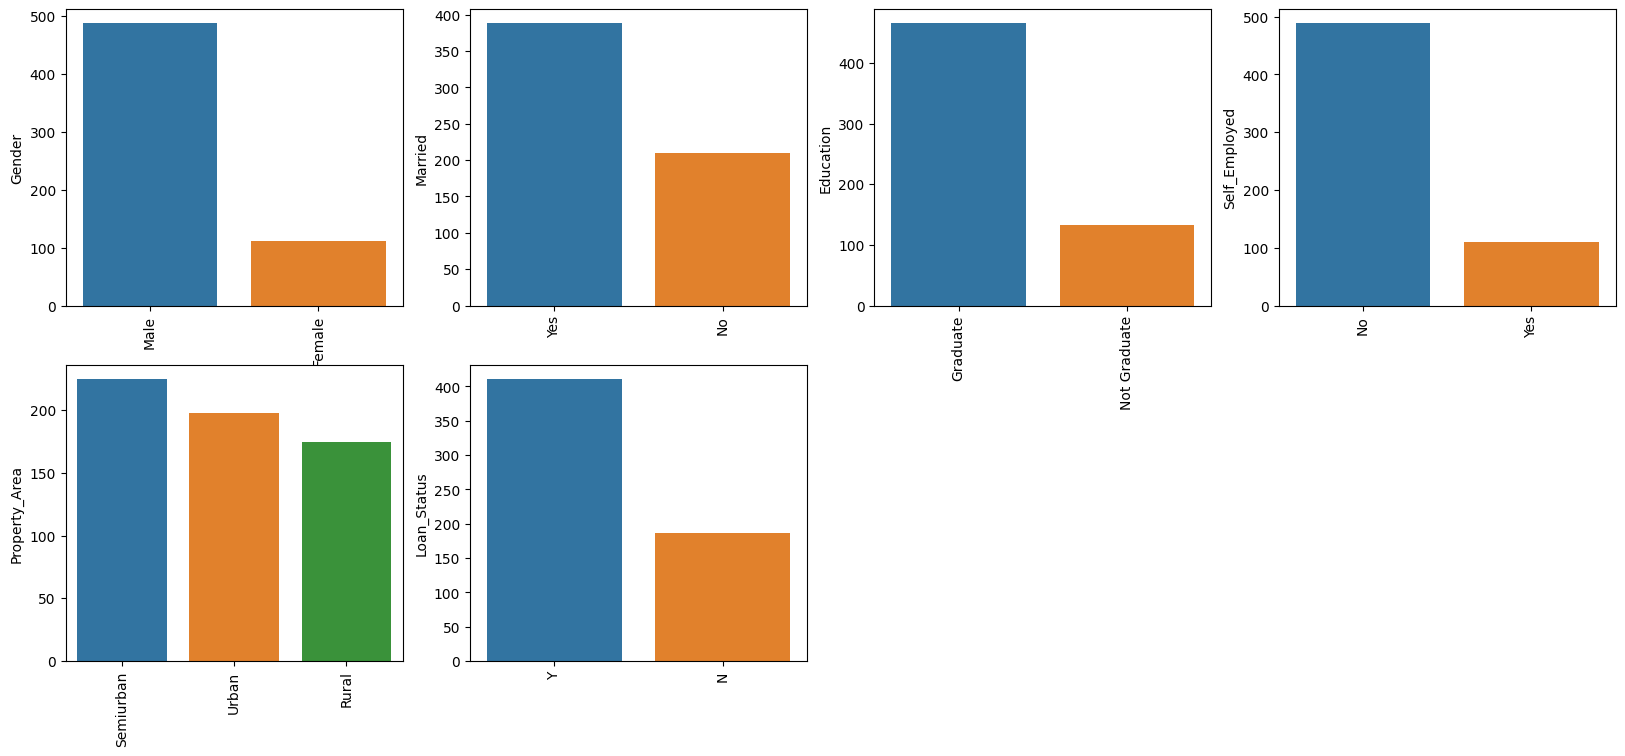

In [41]:
# Visualize the categorical data using barplot
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(20, 50))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

From the chart above, we could observe that most of the features are binary, hence we would use *Label Encoder* to convert the categorical labels to numerical labels.

In [42]:
# Import label encoder
from sklearn import preprocessing
	
# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0.0,0,0,144.968804,360.0,1.0,2,1,5849.0
1,1,1,1.0,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0.0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0.0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0.0,0,0,141.000000,360.0,1.0,2,1,6000.0


In [43]:
# Verify categorical data
# find the number of columns with datatye == "object"
obj = (data.dtypes == "object")
print("Categorical variables: ", len(obj[obj].index))

Categorical variables:  0


## Research Questions

We shall consider these research questions:

1. What is the distribution of loan_status among the different gender groups in the dataset? Are men more likely to get approved for a loan than women?

2. How does the applicant's education level affect their loan approval status? Are graduates more likely to get approved than undergraduates?

3. Does credit_history have a significant impact on loan approval status? Are applicants with a good credit history more likely to get approved for a loan than those with a poor credit history?

4. Can we predict loan_status accurately based on the given features using a machine learning algorithm? If so, which algorithm performs the best? What features are most important in predicting loan approval status?

***1. What is the distribution of loan_status among the different gender groups in the dataset? Are men more likely to get approved for a loan than women?***

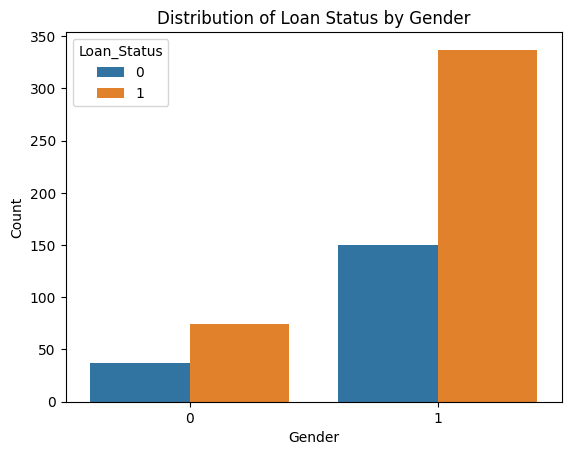

In [44]:
# What is the distribution of loan_status among the different gender groups in the dataset? Are men more likely to get approved for a loan than women?
# Create a count plot
sns.countplot(x='Gender', hue='Loan_Status', data=data)

# Add a title and axis labels
plt.title('Distribution of Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

Following the process of label encoding, the gender categories in the dataset have been represented by numerical values. Specifically, male and female are represented by 1 and 0, respectively.

The count plot generated above demonstrates that around 340 male applicants were approved for loans in comparison to nearly 80 female applicants. Conversely, around 150 male applicants faced loan rejection as compared to approximately 40 female applicants. 

**These observations suggest that male applicants are more likely to receive loan approvals as compared to female applicants in the given dataset.**

***2. How does the applicant's education level affect their loan approval status? Are graduates more likely to get approved than undergraduates?***

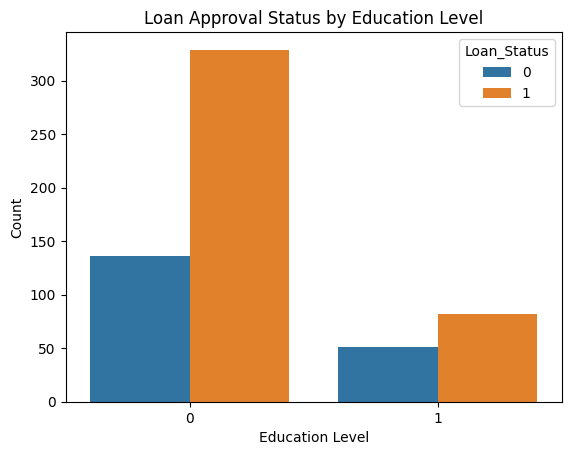

In [45]:
# Create a stacked bar chart
sns.countplot(x='Education', hue='Loan_Status', data=data)

# Add a title and axis labels
plt.title('Loan Approval Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Show the plot
plt.show()

Upon observation of the chart, it is evident that more than 300 female applicants received loan approvals in comparison to only 90 male applicants. However, 140 female applicants faced loan rejections compared to just 50 male applicants. 

***3. Does credit_history have a significant impact on loan approval status? Are applicants with a good credit history more likely to get approved for a loan than those with a poor credit history?***

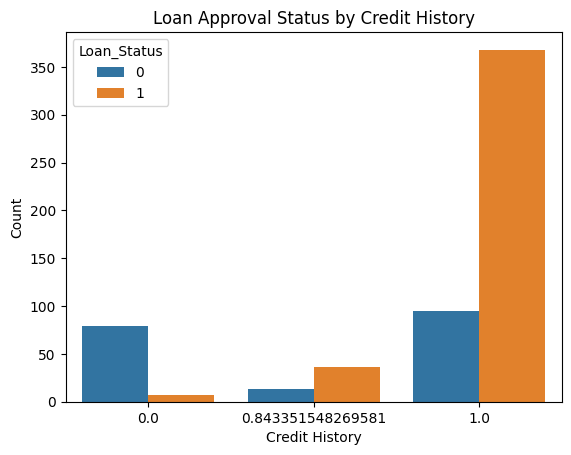

In [46]:
# Create a count plot with Credit_History on the x-axis and hue=Loan_Status to show approved/rejected loans by credit history
sns.countplot(x='Credit_History', hue='Loan_Status', data=data)

# Add a title and axis labels
plt.title('Loan Approval Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')

# Show the plot
plt.show()

The count plot visualization reveals some interesting insights about the impact of credit history on loan approval status. The credit history ranges from 0 to 1, and the results indicate that credit history is a significant predictor of loan approval status.

Applicants with a credit score of 0 are much less likely to be approved for a loan, as evidenced by the fact that 70 of them were refused loan compared to just 5 who were approved. Similarly, applicants with a credit score of 0.84 are less likely to be approved for a loan, with 10 of them being denied loan compared to 30 who were approved.

The visualization also shows that applicants with a credit score of 1 are more likely to be approved for a loan, with over 350 applicants being approved compared to 100 who were denied. This suggests that having a good credit history is an important factor in determining loan approval status, and that applicants with a poor credit history may face greater challenges in obtaining a loan.

Overall, this visualization highlights the importance of credit history in the loan approval process, and underscores the need for applicants to maintain a good credit score to increase their chances of being approved for a loan.

***4. Can we predict loan_status accurately based on the given features using a machine learning algorithm? If so, which algorithm performs the best? What features are most important in predicting loan approval status?***

Based on the analysis and visualizations obtained from the data, it is evident that we can predict loan_status accurately using a classifcation algorithm. The reason is that the loan_status feature, which is the target variable, is binary and classification algorithms work best for binary targets.

So, we shall explore KNeighbors Classifier, Support Vector Classifier, Logistics Regression and Random Forest Classifier and observe which works best for the loan dataset.

## Building the Model

Split the dataset into train and test

In [47]:
from sklearn.model_selection import train_test_split

X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

### Model Training and Evaluation

**As this is a classification problem, we shall use the following models:**

* KNeighborsClassifiers
* Support Vector Classifiers (SVC)
* Logistics Regression
* RandomForestClassifiers

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)
svc = SVC()
lc = LogisticRegression()

### Using K-Fold Cross Validation

In [50]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3) # n_splits specifies the # of k folds

#### Demonstrating K-Fold 

In [51]:
for train, val in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train, val)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


### Cross Validation Function

In [52]:
from sklearn.model_selection import cross_val_score

KNeighborsClassifier model performance using cross_val_score

In [53]:
cross_val_score(KNeighborsClassifier(n_neighbors=3), X, y, cv=3) * 100

array([58.        , 60.30150754, 57.28643216])

Logistic Regression model performance using cross_val_score

In [61]:
cross_val_score(LogisticRegression(), X, y, cv=3) * 100

/home/eben-success/Desktop/Project/Loan_prediction/loan/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/eben-success/Desktop/Project/Loan_prediction/loan/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

array([79.        , 79.89949749, 81.90954774])

Support Vector Classifier Model Performance Using Cross_Val_Score

In [55]:
cross_val_score(SVC(), X, y, cv=3) * 100

array([67.5       , 68.84422111, 67.83919598])

In [56]:
cross_val_score(RandomForestClassifier(), X, y, cv=3) * 100

array([76.        , 78.89447236, 80.40201005])

### Parameter Tunning using K Fold Cross Validation

In [57]:
scores1 = cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X, y, cv=10)
np.average(scores1) * 100

80.77401129943503

In [58]:
scores1 = cross_val_score(LogisticRegression(solver='newton-cholesky', multi_class='ovr'), X, y, cv=10)
np.average(scores1) * 100

80.77401129943503

In [59]:
scores1 = cross_val_score(LogisticRegression(solver='liblinear', multi_class='auto'), X, y, cv=5)
np.average(scores1) * 100

80.27591036414566

In [60]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40), X, y, cv=10)
np.average(scores4) * 100

79.43502824858756

## Summary

Based on the information provided, it is clear that developing a loan approval prediction model using machine learning algorithms can be a useful tool for banks and financial institutions to accurately assess the risk of loan approval and identify potential fraud or misrepresentation by borrowers.

Additionally, the analysis and visualizations have highlighted important insights such as the impact of gender, education level, and credit history on loan approval status. It is evident that male applicants are more likely to receive loan approvals than female applicants, having a good credit history is a significant predictor of loan approval status, and applicants with a poor credit history may face greater challenges in obtaining a loan.

Finally, it is suggested that a classification algorithm can accurately predict loan approval status, and exploring KNeighbors Classifier, Support Vector Classifier, Logistics Regression, and Random Forest Classifier can help determine which algorithm performs the best for the loan dataset.